In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
census_data = pd.read_csv(filepath_or_buffer='census_no_null.csv')
census_data.head()

,Unnamed: 0,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,0,39,State-gov,77516.0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50,Self-emp-not-inc,83311.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38,Private,215646.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53,Private,234721.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,4,28,Private,338409.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Try to observe how features are related. We can use correlation for this and eliminate the features if any of them are strongly correlated.    
https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4     
### As there is no strong correlation, we can keep all the features for training our machine learning model.

In [3]:
census_data.corr()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Unnamed: 0,1.000000,0.010449,-0.000476,-0.001320,0.000965,-0.000493,-0.000569
age,0.010449,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.000476,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
education_num,-0.001320,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital_gain,0.000965,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital_loss,-0.000493,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours_per_week,-0.000569,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


## Lets learn about each feature in our data and try to find outliers. Use boxplot for this.
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [4]:
from matplotlib import pyplot as plt
def plot_box(data_frame, column_name):
    data_frame.boxplot(column=column_name, return_type='dict')
    plt.show()

### Boxplot for age feature and some statistics

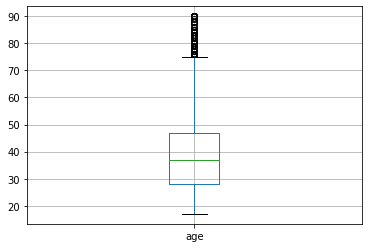

In [5]:
plot_box(census_data, 'age')

In [6]:
census_data.loc[census_data.age>75].shape

(269, 15)

In [7]:
census_data['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

### Boxplot for fnlwgt feature and some statistics

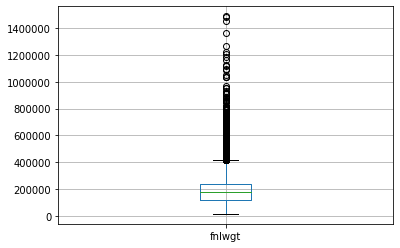

In [8]:
plot_box(census_data, 'fnlwgt')

In [9]:
census_data.loc[census_data.fnlwgt>40000].shape

(42952, 15)

In [10]:
census_data['fnlwgt'].describe()

count    4.522200e+04
mean     1.897347e+05
std      1.056392e+05
min      1.349200e+04
25%      1.173882e+05
50%      1.783160e+05
75%      2.379260e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

### Boxplot for capital_gain feature and some statistics

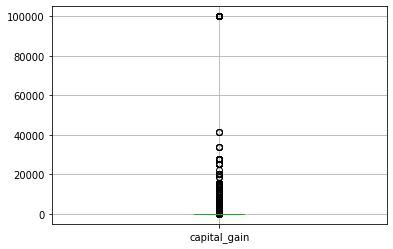

In [11]:
plot_box(census_data, 'capital_gain')

In [12]:
census_data.loc[census_data.capital_gain<20000].shape

(44867, 15)

In [13]:
census_data['capital_gain'].describe()

count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

### Boxplot for capital_loss feature and some statistics

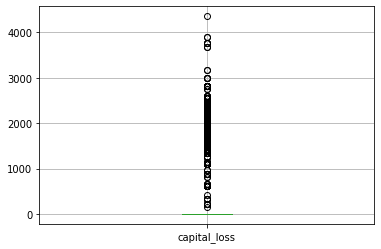

In [14]:
plot_box(census_data, 'capital_loss')

In [15]:
census_data.loc[census_data.capital_loss>0].shape

(2140, 15)

In [16]:
census_data['capital_loss'].describe()

count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

## Lets do some exploratory analysis on the data

### Count of people by native country wise who are earning less than or equal to 50K 

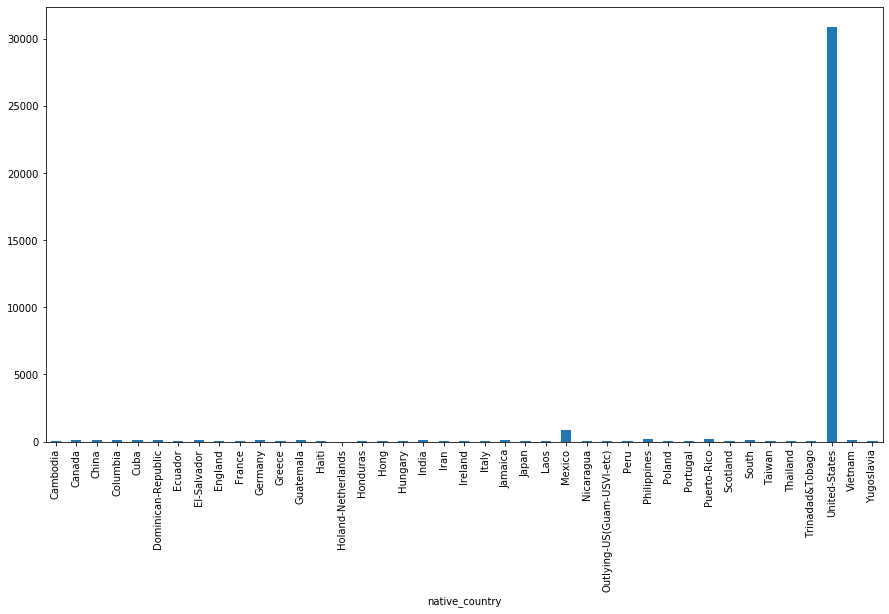

In [17]:
census_data[census_data.income_level == '<=50K'].groupby('native_country', axis = 0).size().plot.bar(figsize=(15,8))

### Count of people by native country wise who are earning greater than 50K 

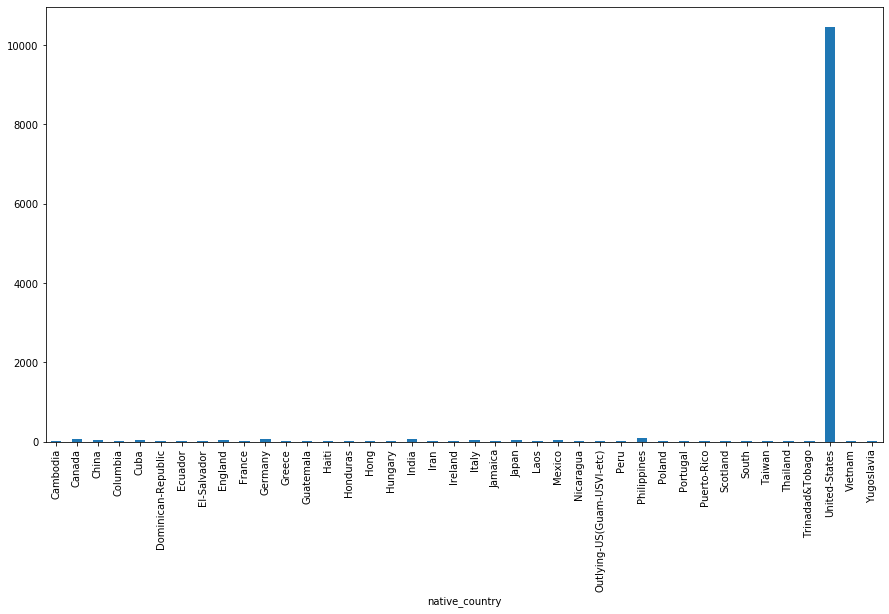

In [18]:
census_data[census_data.income_level == '>50K'].groupby('native_country', axis = 0).size().plot.bar(figsize=(15,8))

### Count of people by sex wise who are earning less than or equal to 50K 

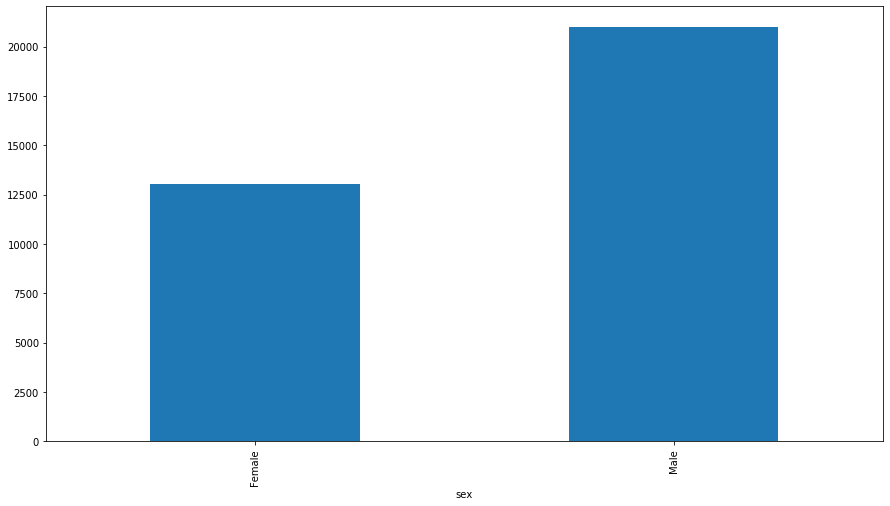

In [19]:
census_data[census_data.income_level == '<=50K'].groupby('sex', axis = 0).size().plot.bar(figsize=(15,8))

### Count of people by sex wise who are earning greater than 50K 

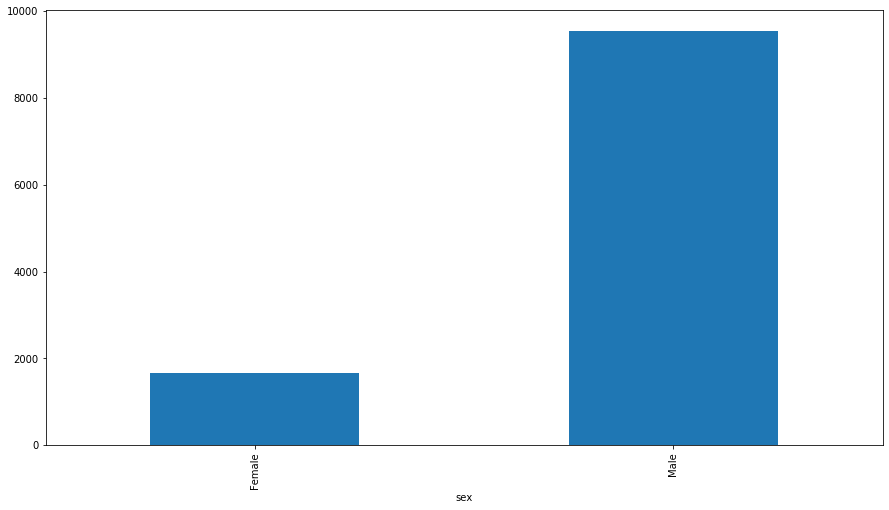

In [20]:
census_data[census_data.income_level == '>50K'].groupby('sex', axis = 0).size().plot.bar(figsize=(15,8))

### Count of people by sex and relationship wise who are earning less than or equal to 50K 

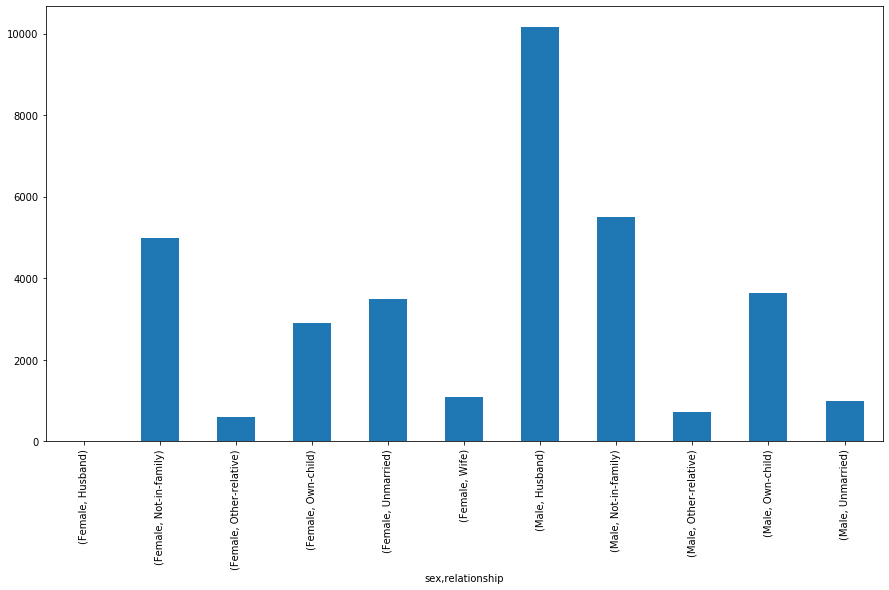

In [21]:
census_data[census_data.income_level == '<=50K'].groupby(['sex','relationship'], axis = 0).size().plot.bar(figsize=(15,8))

### Count of people sex and relationship wise who are earning greater than 50K 

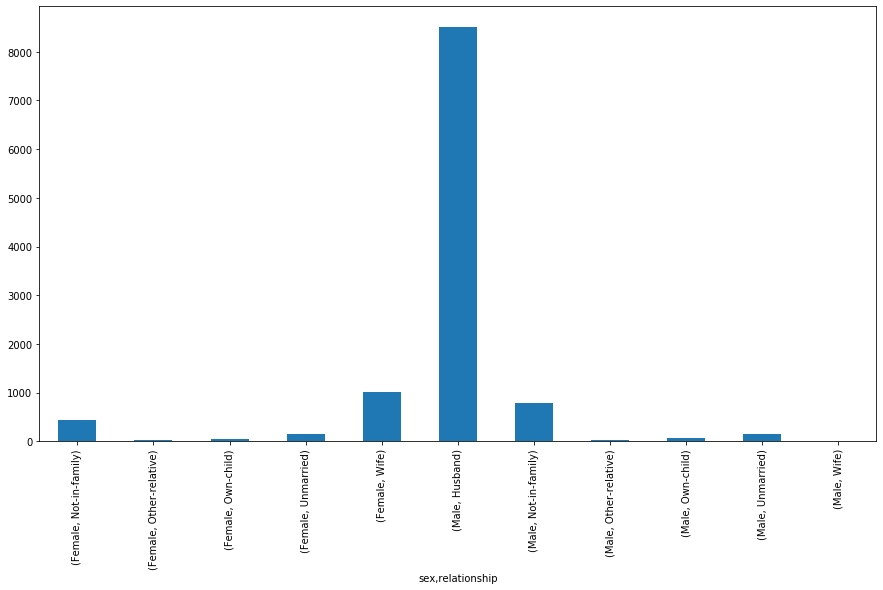

In [22]:
census_data[census_data.income_level == '>50K'].groupby(['sex','relationship'], axis = 0).size().plot.bar(figsize=(15,8))